<a href="https://colab.research.google.com/github/Rozvilka/lab2LaTeX/blob/main/MPlab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Мальтуса**

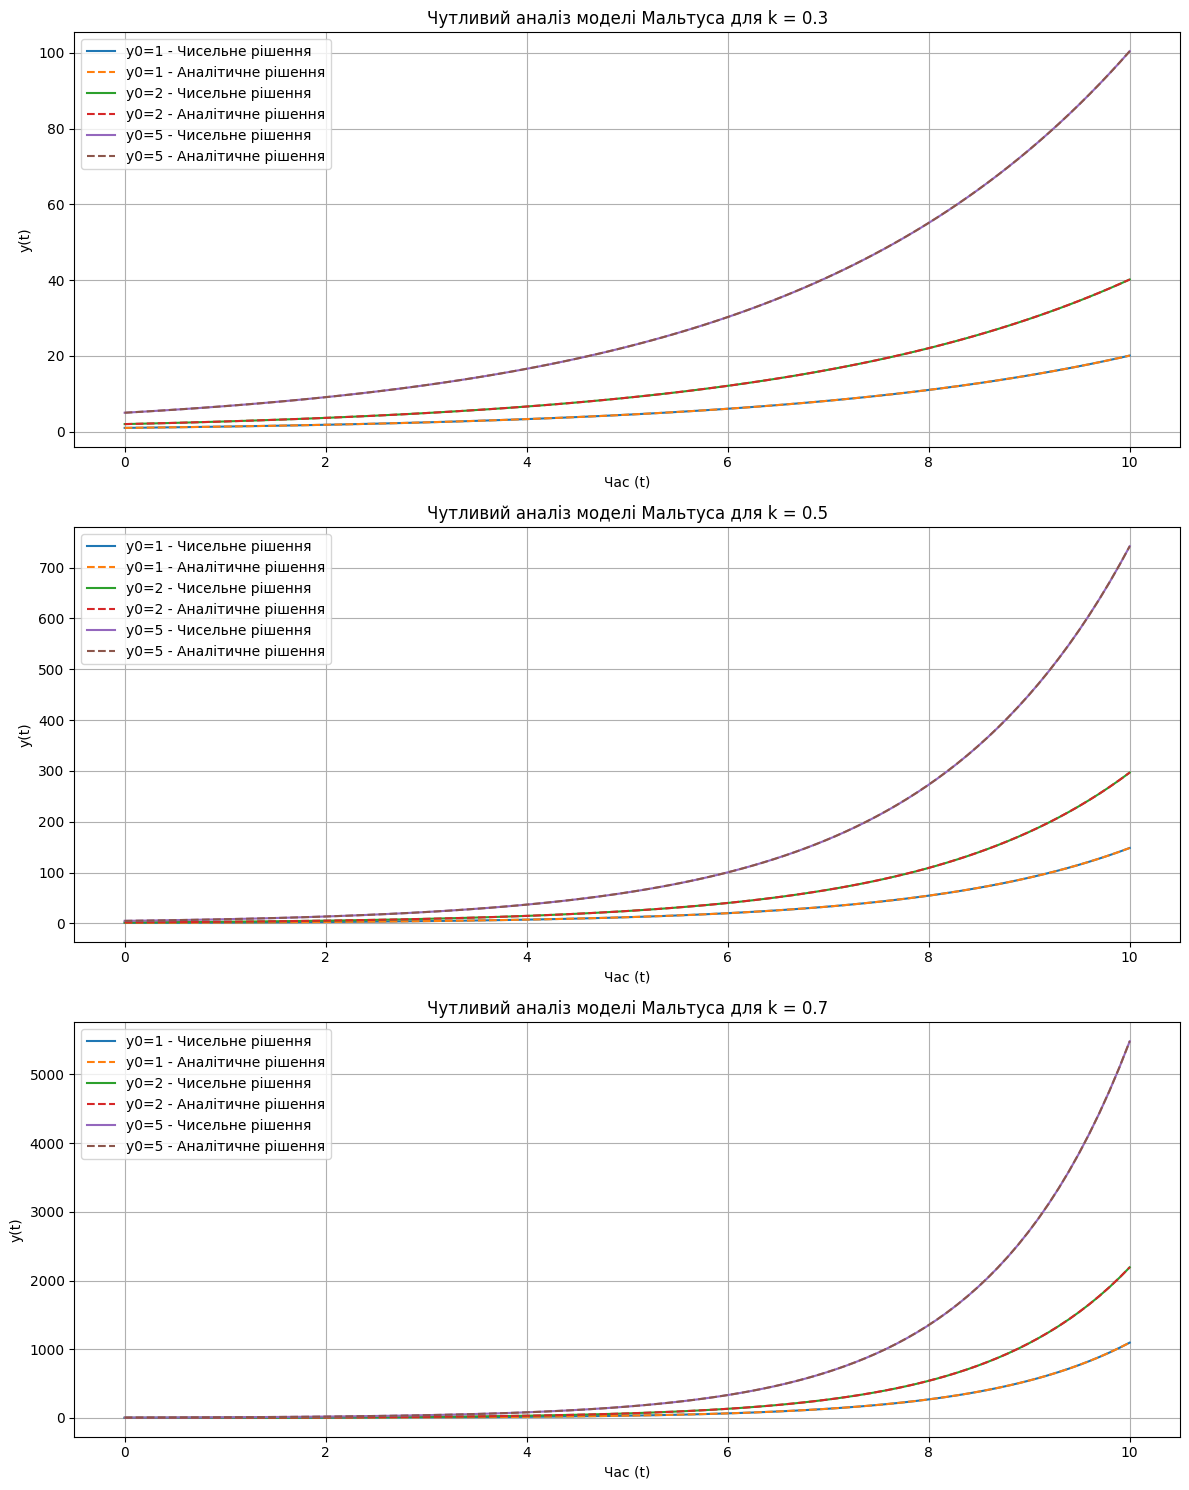

In [ ]:
# 1. Імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 2. Визначення параметрів моделі Мальтуса
k_values = [0.3, 0.5, 0.7]  # Зміна коефіцієнта зростання
y0_values = [1, 2, 5]  # Зміна початкового значення популяції
t_span: tuple[float, float] = (0, 10)
t_eval: np.ndarray = np.linspace(t_span[0], t_span[1], 100)

# 3. Опис правої частини рівняння Мальтуса
def malthus_model(t: float, y: np.ndarray, k: float) -> np.ndarray:
    return k * y

# 4. Створення графіків для порівняння
fig, axes = plt.subplots(3, 1, figsize=(12, 15))  # Три графіки

for i, k in enumerate(k_values):
    ax = axes[i]  # Отримуємо відповідний графік для поточного значення k

    for y0 in y0_values:
        # 5. Чисельне розв'язання для кожної пари (k, y0)
        solution = solve_ivp(malthus_model, t_span, [y0], args=(k,), t_eval=t_eval)

        # 6. Аналітичний розв'язок для кожної пари (k, y0)
        analytical_solution = y0 * np.exp(k * t_eval)

        # 7. Побудова графіків для чисельного та аналітичного розв'язків
        label = f"y0={y0}"
        ax.plot(solution.t, solution.y[0], label=f"{label} - Чисельне рішення")
        ax.plot(t_eval, analytical_solution, '--', label=f"{label} - Аналітичне рішення")

    # 8. Оформлення графіка
    ax.set_title(f"Чутливий аналіз моделі Мальтуса для k = {k}")
    ax.set_xlabel("Час (t)")
    ax.set_ylabel("y(t)")
    ax.grid(True)
    ax.legend(loc='upper left')

plt.tight_layout()  # Автоматично коригує розташування графіків
plt.show()


**Логістична модель**

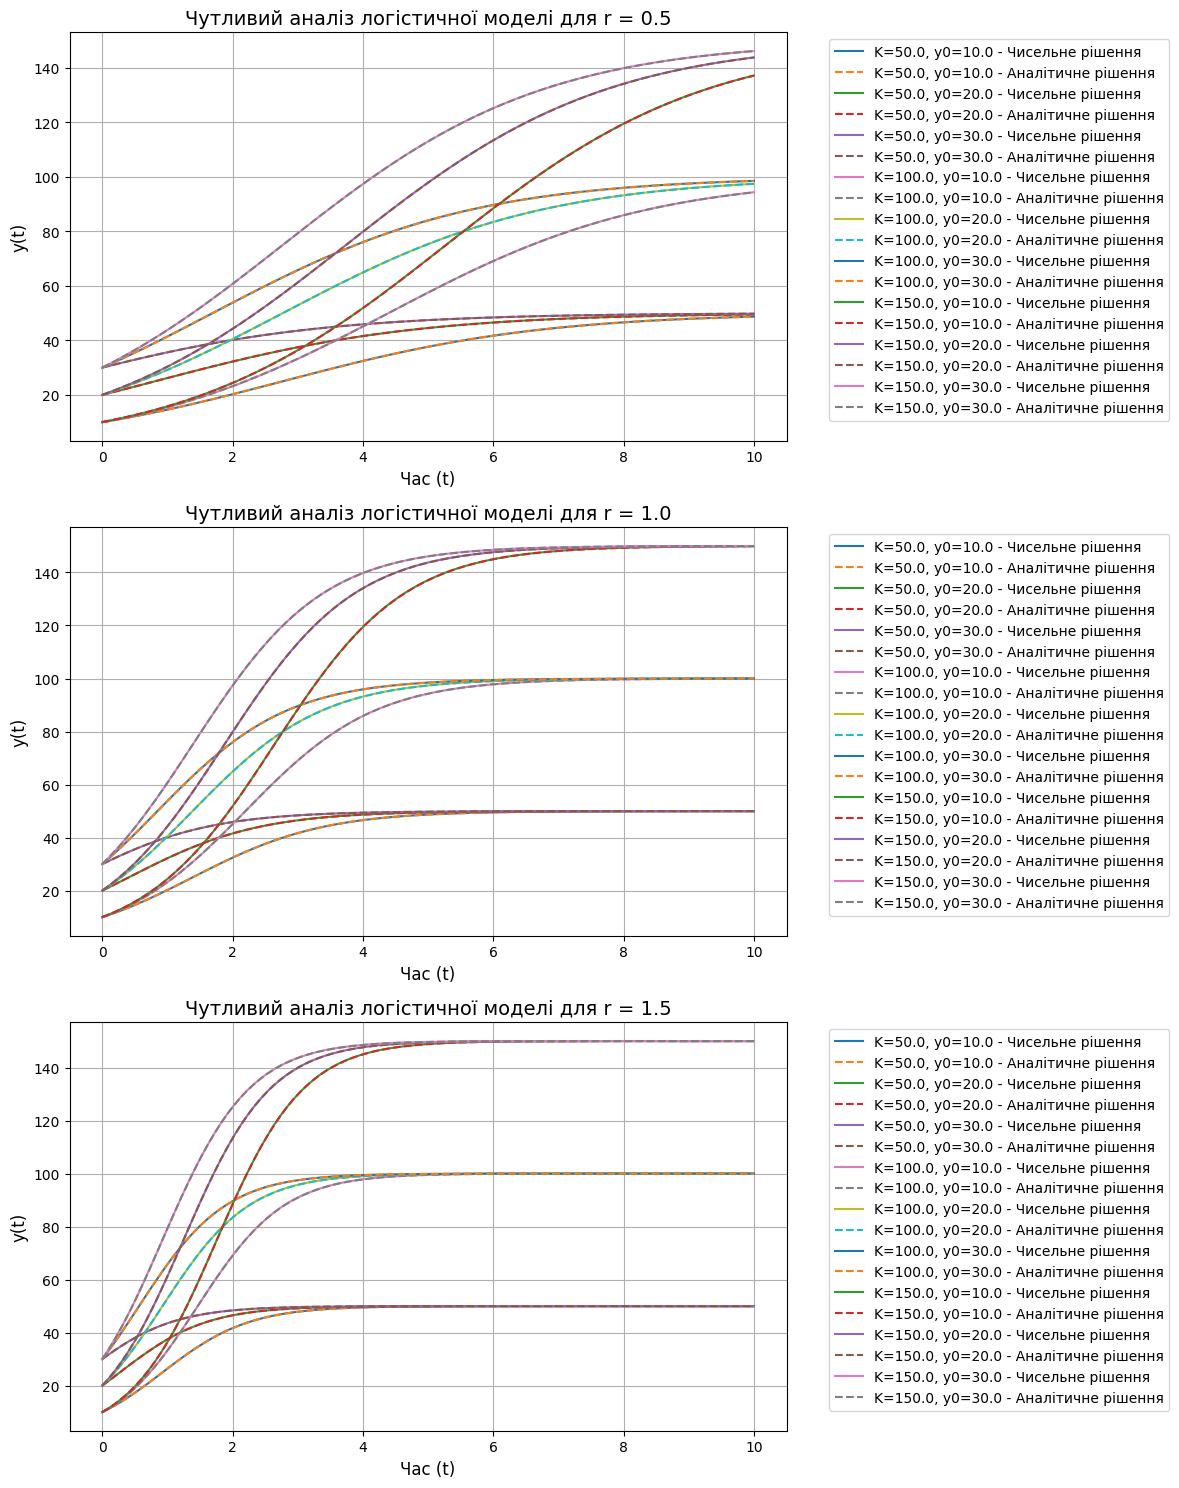

In [ ]:
# 1. Імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 2. Визначення параметрів логістичної моделі
r_values = [0.5, 1.0, 1.5]  # Зміна швидкості зростання
K_values = [50.0, 100.0, 150.0]  # Зміна місткості середовища
y0_values = [10.0, 20.0, 30.0]  # Зміна початкової популяції
t_span: tuple[float, float] = (0, 10)
t_eval: np.ndarray = np.linspace(t_span[0], t_span[1], 100)

# 3. Опис правої частини логістичної моделі
def logistic_model(t: float, y: np.ndarray, r: float, K: float) -> np.ndarray:
    return r * y * (1 - y / K)

# 4. Створення графіків для порівняння
fig, axes = plt.subplots(3, 1, figsize=(12, 15))  # Три графіки

# Аналіз для різних значень
for i, r in enumerate(r_values):
    ax = axes[i]  # Отримуємо відповідний графік для поточного значення r

    for K in K_values:
        for y0 in y0_values:
            # 5. Чисельне розв'язання для кожної пари (r, K, y0)
            solution = solve_ivp(logistic_model, t_span, [y0], args=(r, K), t_eval=t_eval)

            # 6. Аналітичний розв'язок для кожної пари (r, K, y0)
            analytical_solution = K / (1 + ((K - y0) / y0) * np.exp(-r * t_eval))

            # 7. Побудова графіків для чисельного та аналітичного розв'язків
            label = f"K={K}, y0={y0}"
            ax.plot(solution.t, solution.y[0], label=f"{label} - Чисельне рішення")
            ax.plot(t_eval, analytical_solution, '--', label=f"{label} - Аналітичне рішення")

    # 8. Оформлення графіка
    ax.set_title(f"Чутливий аналіз логістичної моделі для r = {r}", fontsize=14)
    ax.set_xlabel("Час (t)", fontsize=12)
    ax.set_ylabel("y(t)", fontsize=12)
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

plt.tight_layout()  # Автоматично коригує розташування графіків
plt.show()


**Модель** **Лотка–Вольтера**

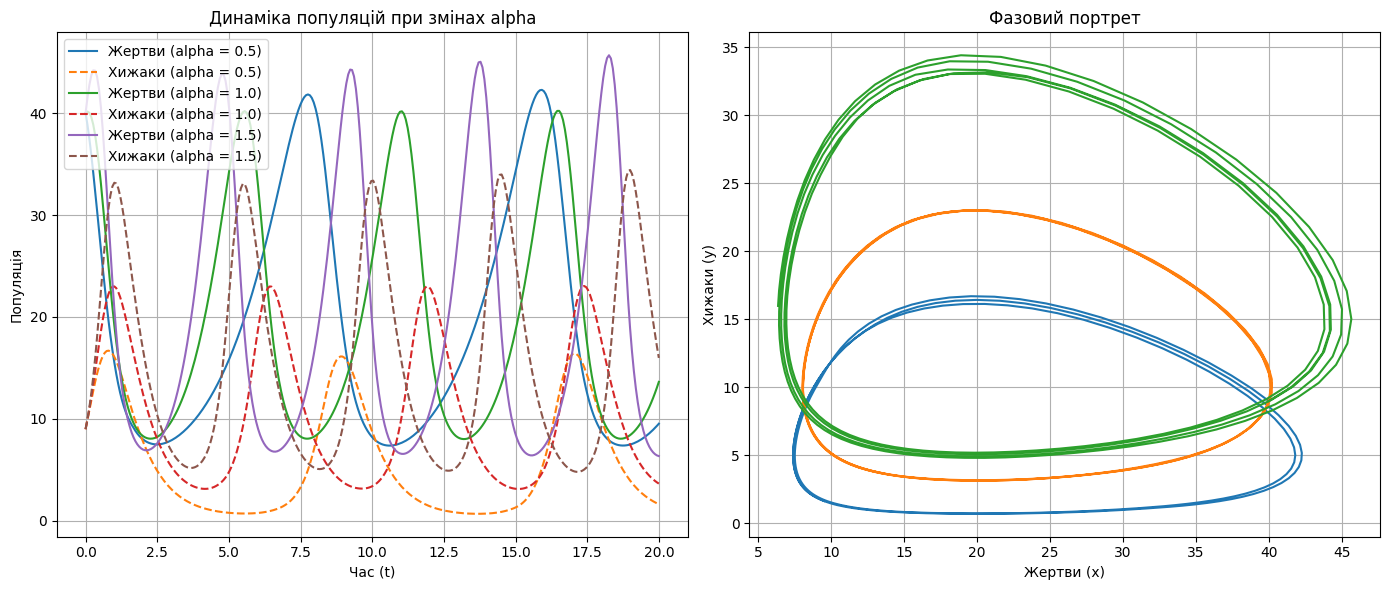

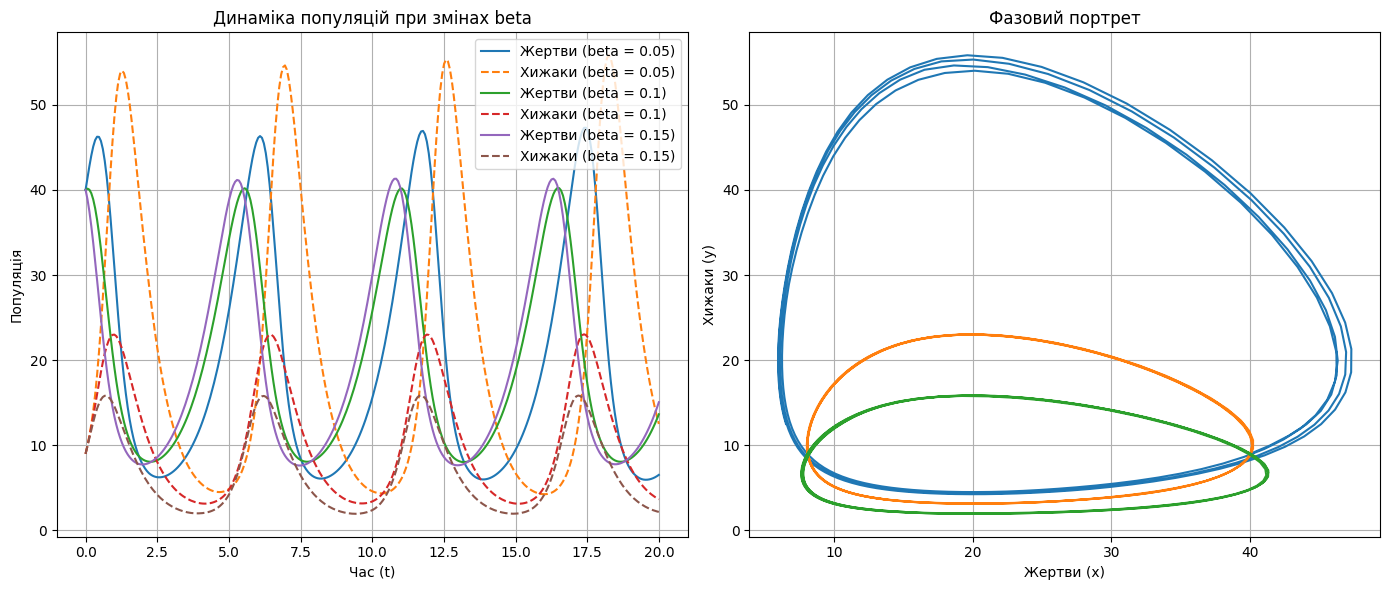

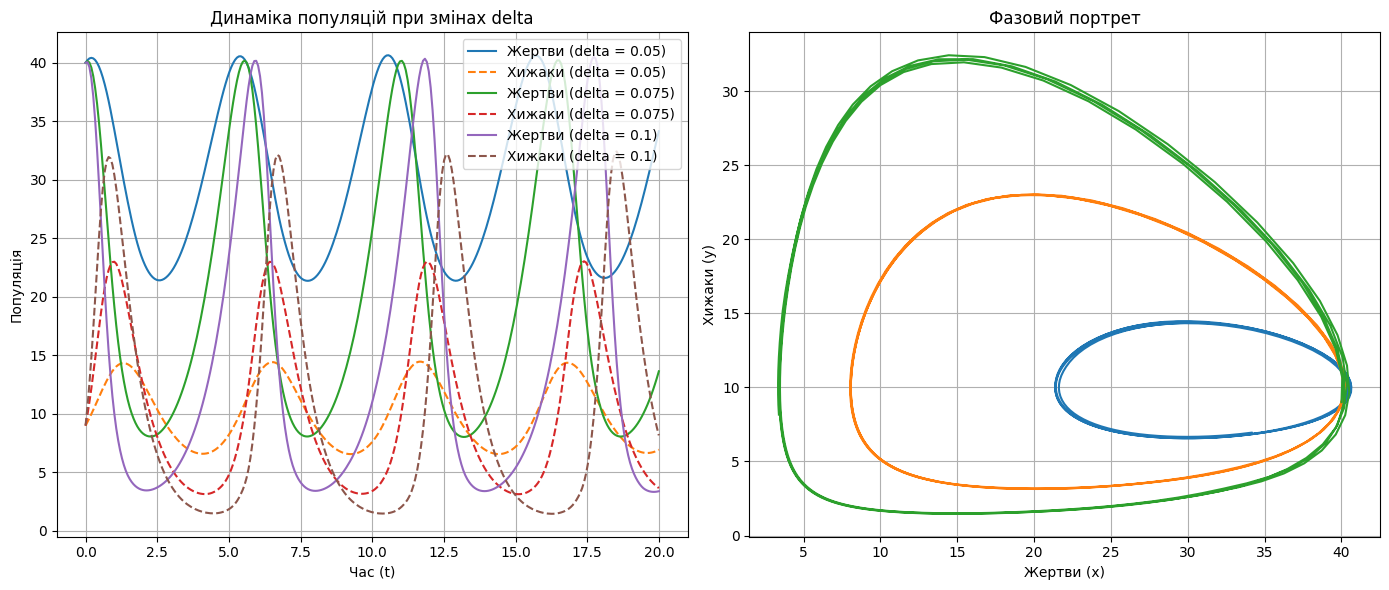

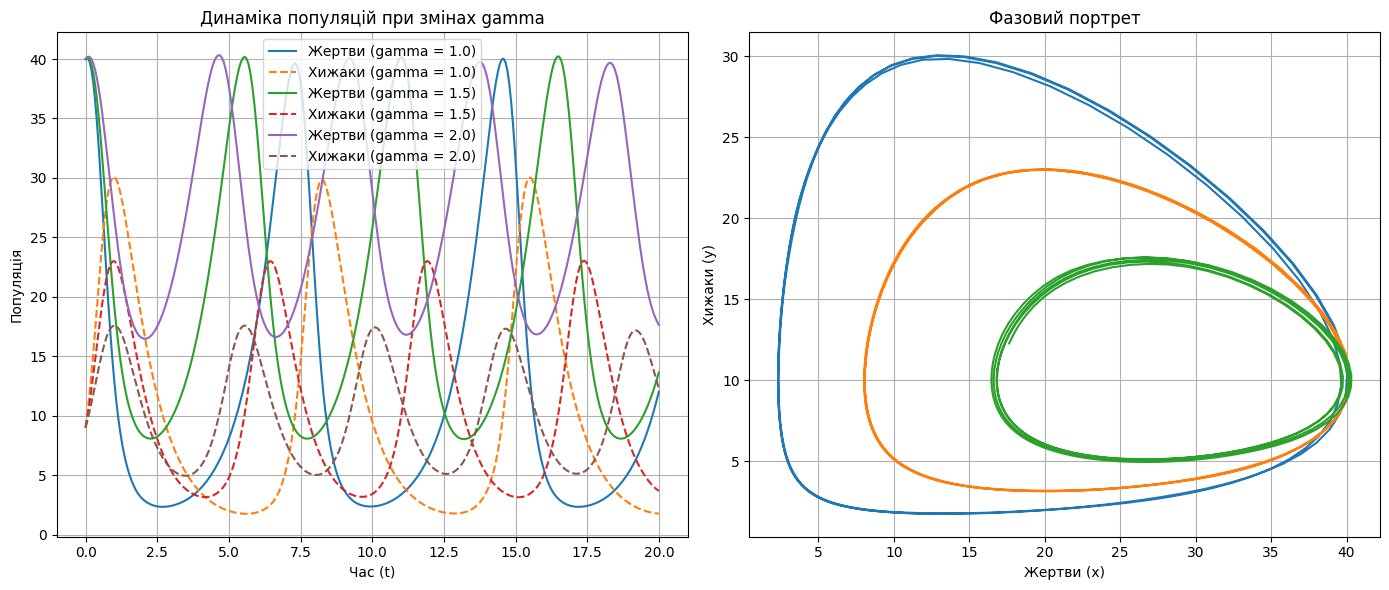

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Базові параметри моделі Лотка-Вольтера
alpha: float = 1.0  # Коефіцієнт природного зростання жертв
beta: float = 0.1   # Коефіцієнт зменшення популяції жертв через хижацтво
delta: float = 0.075  # Коефіцієнт приросту хижаків завдяки споживанню жертв
gamma: float = 1.5    # Коефіцієнт природної смертності хижаків

# Початкові умови:
x0: float = 40.0  # Початкова чисельність жертв
y0: float = 9.0   # Початкова чисельність хижаків

# Проміжок часу для розв'язку:
t_span: tuple[float, float] = (0, 20)
t_eval: np.ndarray = np.linspace(t_span[0], t_span[1], 300)

# Опис системи рівнянь Лотка-Вольтера
def lotka_volterra_model(t: float, z: np.ndarray, alpha: float, beta: float, delta: float, gamma: float) -> np.ndarray:
    """
    Функція, що повертає похідні для системи рівнянь Лотка–Вольтера.
    """
    x, y = z
    dxdt: float = alpha * x - beta * x * y
    dydt: float = delta * x * y - gamma * y
    return np.array([dxdt, dydt])

# Функція для побудови графіків чутливості параметрів
def plot_lotka_volterra_sensitivity(param_name: str, param_values: np.ndarray, base_params: dict):
    plt.figure(figsize=(14, 6))

    # Варіація для кожного параметра
    for param_value in param_values:
        # Копіюємо базові параметри та змінюємо тільки відповідний параметр
        params = base_params.copy()
        params[param_name] = param_value

        # Рішення для поточного набору параметрів
        solution = solve_ivp(
            lotka_volterra_model,
            t_span,
            [x0, y0],
            args=(params['alpha'], params['beta'], params['delta'], params['gamma']),
            t_eval=t_eval
        )

        # Графік зміни популяцій в часі
        plt.subplot(1, 2, 1)
        label = f"{param_name} = {param_value}"
        plt.plot(solution.t, solution.y[0], label=f"Жертви ({label})")
        plt.plot(solution.t, solution.y[1], label=f"Хижаки ({label})", linestyle='--')

        # Фазовий портрет для поточного параметра
        plt.subplot(1, 2, 2)
        plt.plot(solution.y[0], solution.y[1], label=f"Фазовий портрет для {param_name} = {param_value}")

    # Підпис для графіків
    plt.subplot(1, 2, 1)
    plt.xlabel("Час (t)")
    plt.ylabel("Популяція")
    plt.title(f"Динаміка популяцій при змінах {param_name}")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.xlabel("Жертви (x)")
    plt.ylabel("Хижаки (y)")
    plt.title("Фазовий портрет")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Базові параметри
base_params = {
    'alpha': alpha,
    'beta': beta,
    'delta': delta,
    'gamma': gamma
}

# Зміни параметрів для аналізу чутливості
alpha_values = [0.5, 1.0, 1.5]  # Варіації для alpha
beta_values = [0.05, 0.1, 0.15]  # Варіації для beta
delta_values = [0.05, 0.075, 0.1]  # Варіації для delta
gamma_values = [1.0, 1.5, 2.0]  # Варіації для gamma

# Побудова графіків для кожного параметра
plot_lotka_volterra_sensitivity('alpha', alpha_values, base_params)
plot_lotka_volterra_sensitivity('beta', beta_values, base_params)
plot_lotka_volterra_sensitivity('delta', delta_values, base_params)
plot_lotka_volterra_sensitivity('gamma', gamma_values, base_params)


**Модель EOQ**

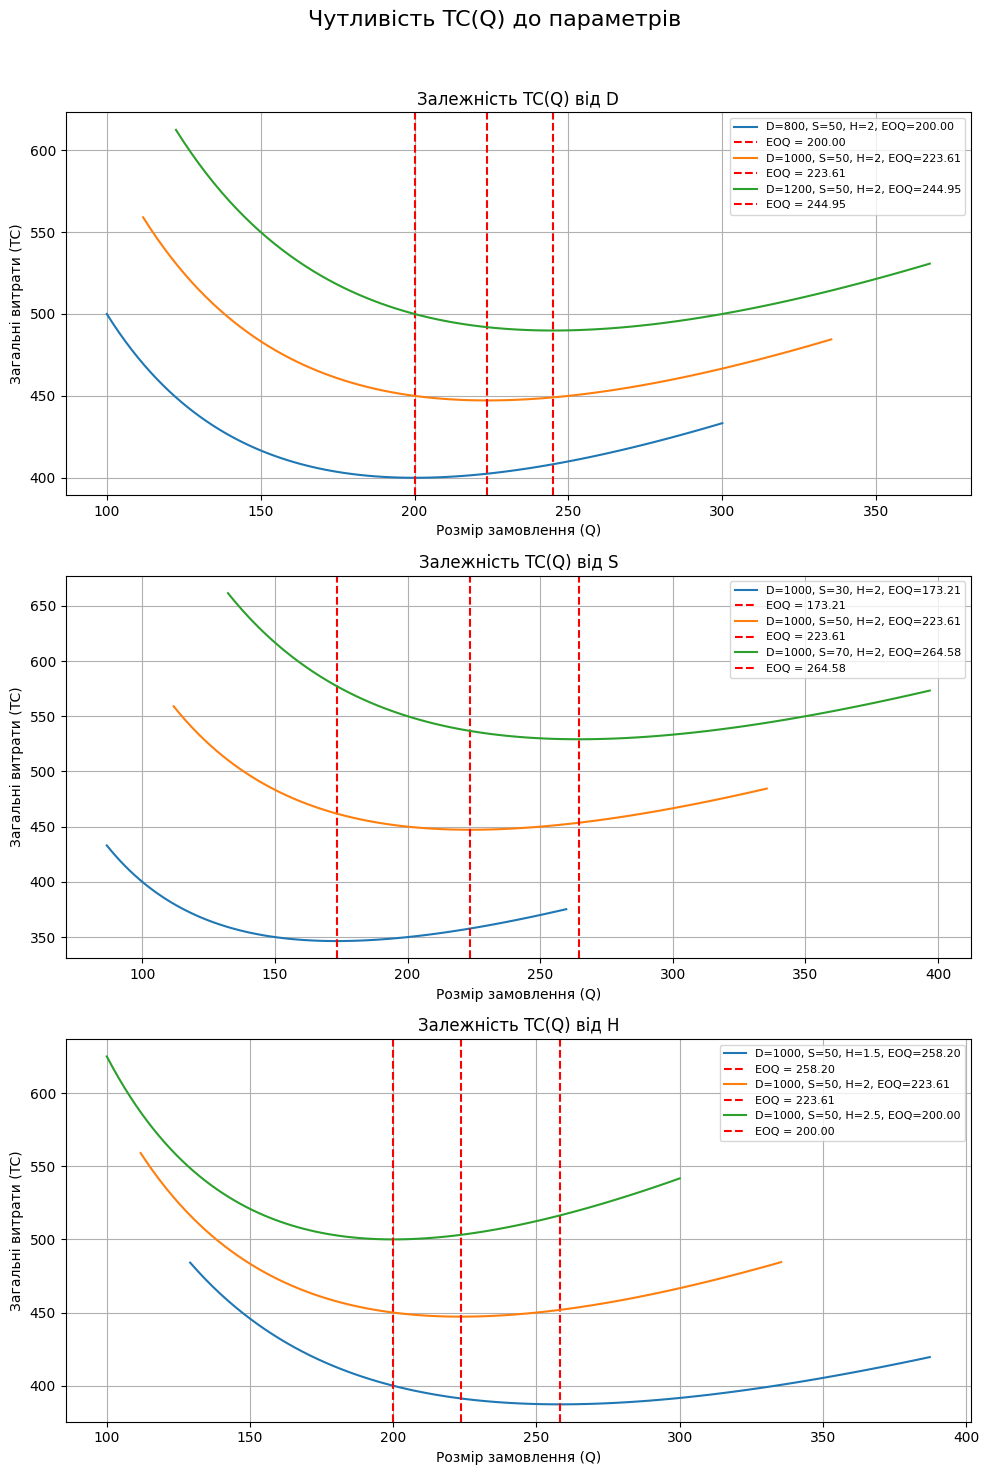

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Базові параметри моделі EOQ
base_params = {
    "D": 1000,  # Щорічний попит
    "S": 50,    # Вартість оформлення одного замовлення
    "H": 2      # Вартість зберігання одиниці товару
}

# Формули для EOQ і загальних витрат
def compute_eoq(D, S, H):
    return math.sqrt((2 * D * S) / H)

def total_cost(Q, D, S, H):
    return (D / Q) * S + (Q / 2) * H

# Діапазони змін параметрів
param_variations = {
    "D": [800, 1000, 1200],  # Щорічний попит
    "S": [30, 50, 70],       # Вартість замовлення
    "H": [1.5, 2, 2.5]       # Вартість зберігання одиниці товару
}

# Побудова графіків
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle("Чутливість TC(Q) до параметрів", fontsize=16)

for i, (param, values) in enumerate(param_variations.items()):
    ax = axes[i]
    for value in values:
        # Оновлення параметрів
        params = base_params.copy()
        params[param] = value

        # Обчислення EOQ
        eoq = compute_eoq(params["D"], params["S"], params["H"])

        # Генерація значень Q і TC
        Q_values = np.linspace(eoq * 0.5, eoq * 1.5, 100)
        TC_values = np.array([total_cost(Q, params["D"], params["S"], params["H"]) for Q in Q_values])

        legend_text = (
            f"D={params['D']}, S={params['S']}, H={params['H']}, EOQ={eoq:.2f}"
        )

        # Графік залежності TC(Q)
        ax.plot(Q_values, TC_values, label=legend_text)
        ax.axvline(x=eoq, color='r', linestyle='--', label=f'EOQ = {eoq:.2f}')

    ax.set_title(f"TC(Q) від {param}")
    ax.set_xlabel("Розмір замовлення (Q)")
    ax.set_ylabel("Загальні витрати (TC)")
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Модель попиту і пропозиції**

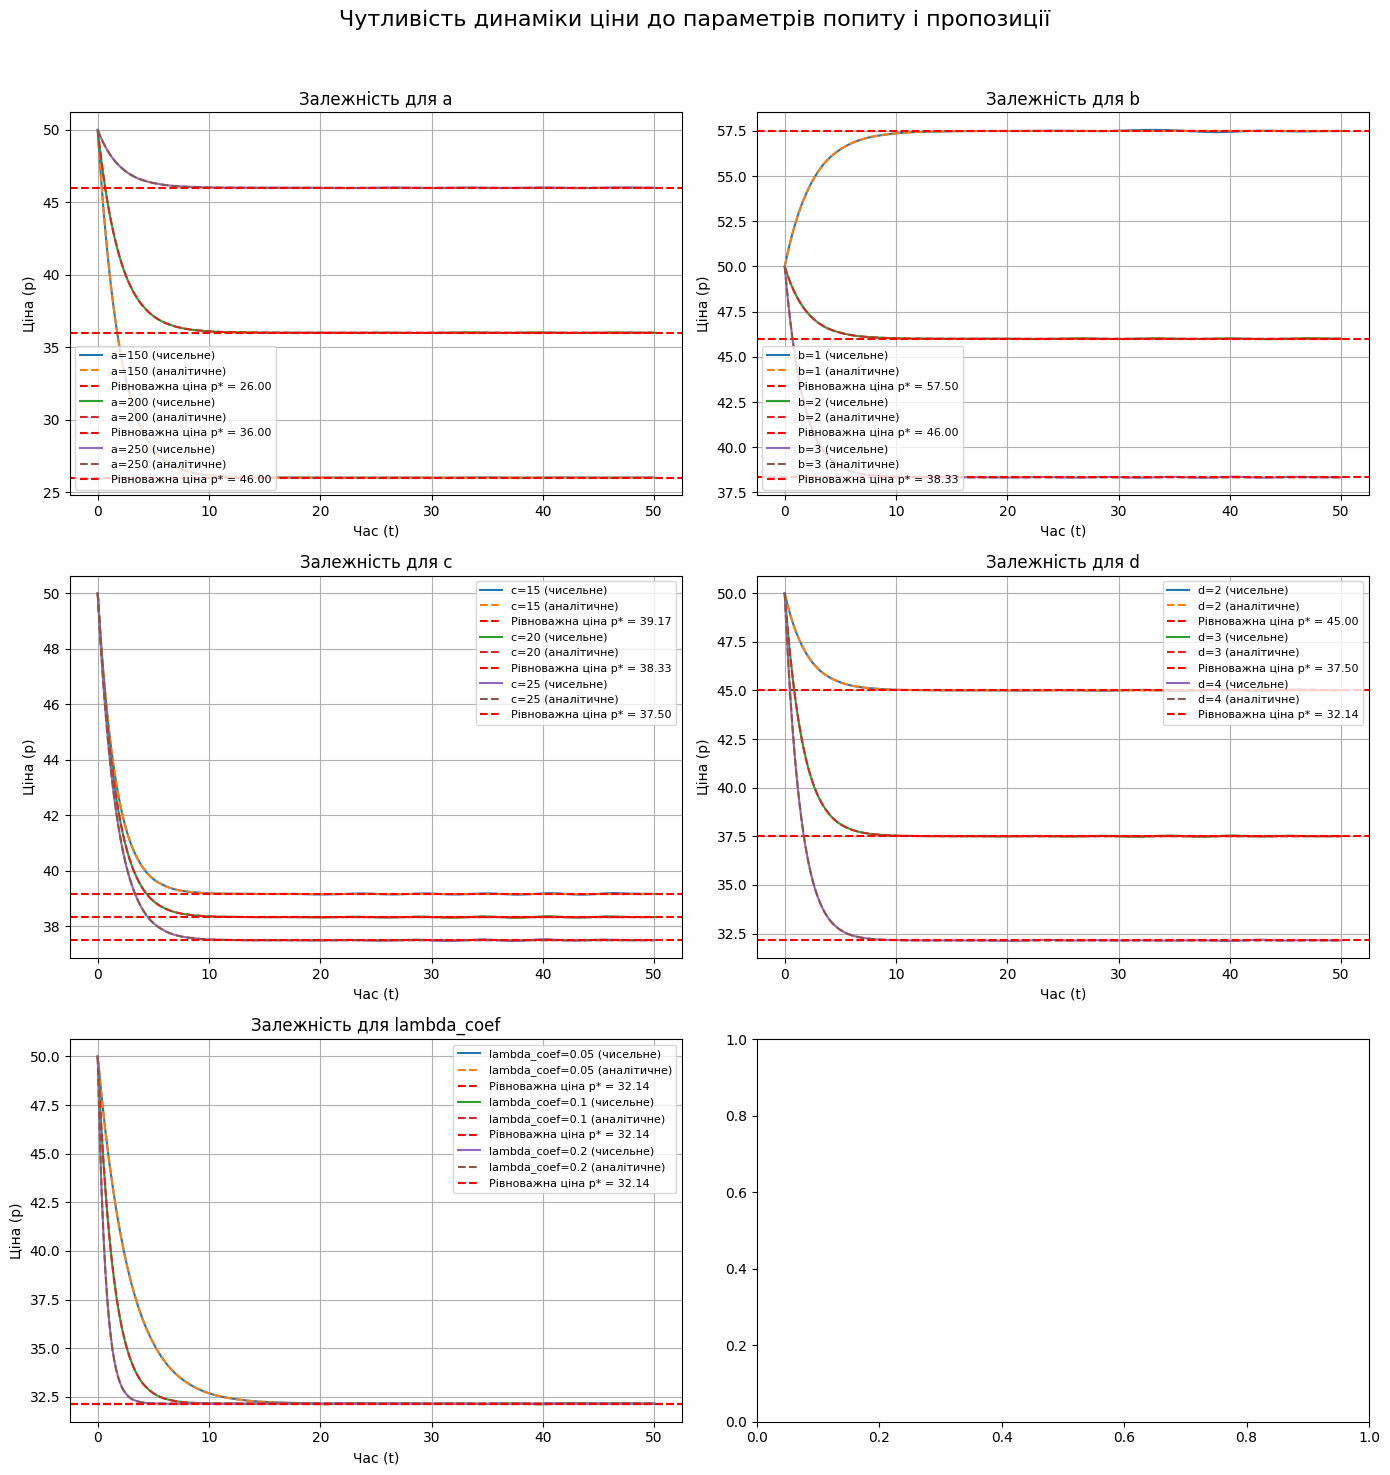

In [ ]:
# 1. Імпорт необхідних бібліотек з типами
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 2. Визначення параметрів моделі попиту і пропозиції
a: float = 200  # Максимальний попит при нульовій ціні
b: float = 2    # Коефіцієнт, що визначає зниження попиту при зростанні ціни
c: float = 20   # Базова кількість товару, що пропонується при нульовій ціні
d: float = 3    # Коефіцієнт, що визначає зростання пропозиції при зростанні ціни
lambda_coef: float = 0.1  # Коефіцієнт корекції ціни
p0: float = 50  # Початкова ціна

# Проміжок часу для моделювання
t_span: tuple[float, float] = (0, 50)
t_eval: np.ndarray = np.linspace(t_span[0], t_span[1], 300)

# 3. Визначення функцій попиту та пропозиції
def demand(p: float) -> float:
    """
    Функція попиту D(p) = a - b*p
    """
    return a - b * p

def supply(p: float) -> float:
    """
    Функція пропозиції S(p) = c + d*p
    """
    return c + d * p

# Розрахунок рівноважної ціни p*
def compute_equilibrium_price(a: float, b: float, c: float, d: float) -> float:
    return (a - c) / (b + d)

# Опис диференціального рівняння для динаміки ціни
def price_dynamics(t: float, p: np.ndarray) -> np.ndarray:
    """
    Модель динаміки ціни:
    dp/dt = lambda_coef * (D(p) - S(p))

    Параметри:
    - t: поточний час (тип float)
    - p: поточна ціна (масив NumPy, ndarray)

    Повертає:
    - dp/dt як масив NumPy (ndarray)
    """
    current_p: float = p[0]
    dpdt: float = lambda_coef * (demand(current_p) - supply(current_p))
    return np.array([dpdt])

# 4. Побудова графіків чутливості для кожного параметра

# Визначаємо варіації параметрів для чутливості
param_variations = {
    "a": [150, 200, 250],  # Змінюємо
    "b": [1, 2, 3],
    "c": [15, 20, 25],
    "d": [2, 3, 4],
    "lambda_coef": [0.05, 0.1, 0.2]
}

# Підготовка графіків
fig, axes = plt.subplots(3, 2, figsize=(14, 15))  # 3 рядки і 2 стовпці
fig.suptitle("Чутливість динаміки ціни до параметрів попиту і пропозиції", fontsize=16)

# Створюємо графіки для кожного параметра
for i, (param, values) in enumerate(param_variations.items()):
    ax = axes[i // 2, i % 2]  # Вибір підграфіка (3x2)

    for value in values:
        # Оновлюємо відповідний параметр
        globals()[param] = value
        p_equilibrium = compute_equilibrium_price(a, b, c, d)

        # Чисельне розв'язання
        solution = solve_ivp(price_dynamics, t_span, [p0], t_eval=t_eval)

        # Аналітичний розв'язок
        analytical_solution = analytical_price(t_eval, p0, p_equilibrium, lambda_coef, b, d)

        # Побудова графіка
        ax.plot(solution.t, solution.y[0], label=f"{param}={value} (чисельне)")
        ax.plot(t_eval, analytical_solution, '--', label=f"{param}={value} (аналітичне)")

        # Додаємо вертикальну лінію для рівноважної ціни
        ax.axhline(y=p_equilibrium, color='r', linestyle='--', label=f'Рівноважна ціна p* = {p_equilibrium:.2f}')

    # Оформлення графіка
    ax.set_title(f"Залежність для {param}")
    ax.set_xlabel("Час (t)")
    ax.set_ylabel("Ціна (p)")
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Модель прогнозування інвестицій**

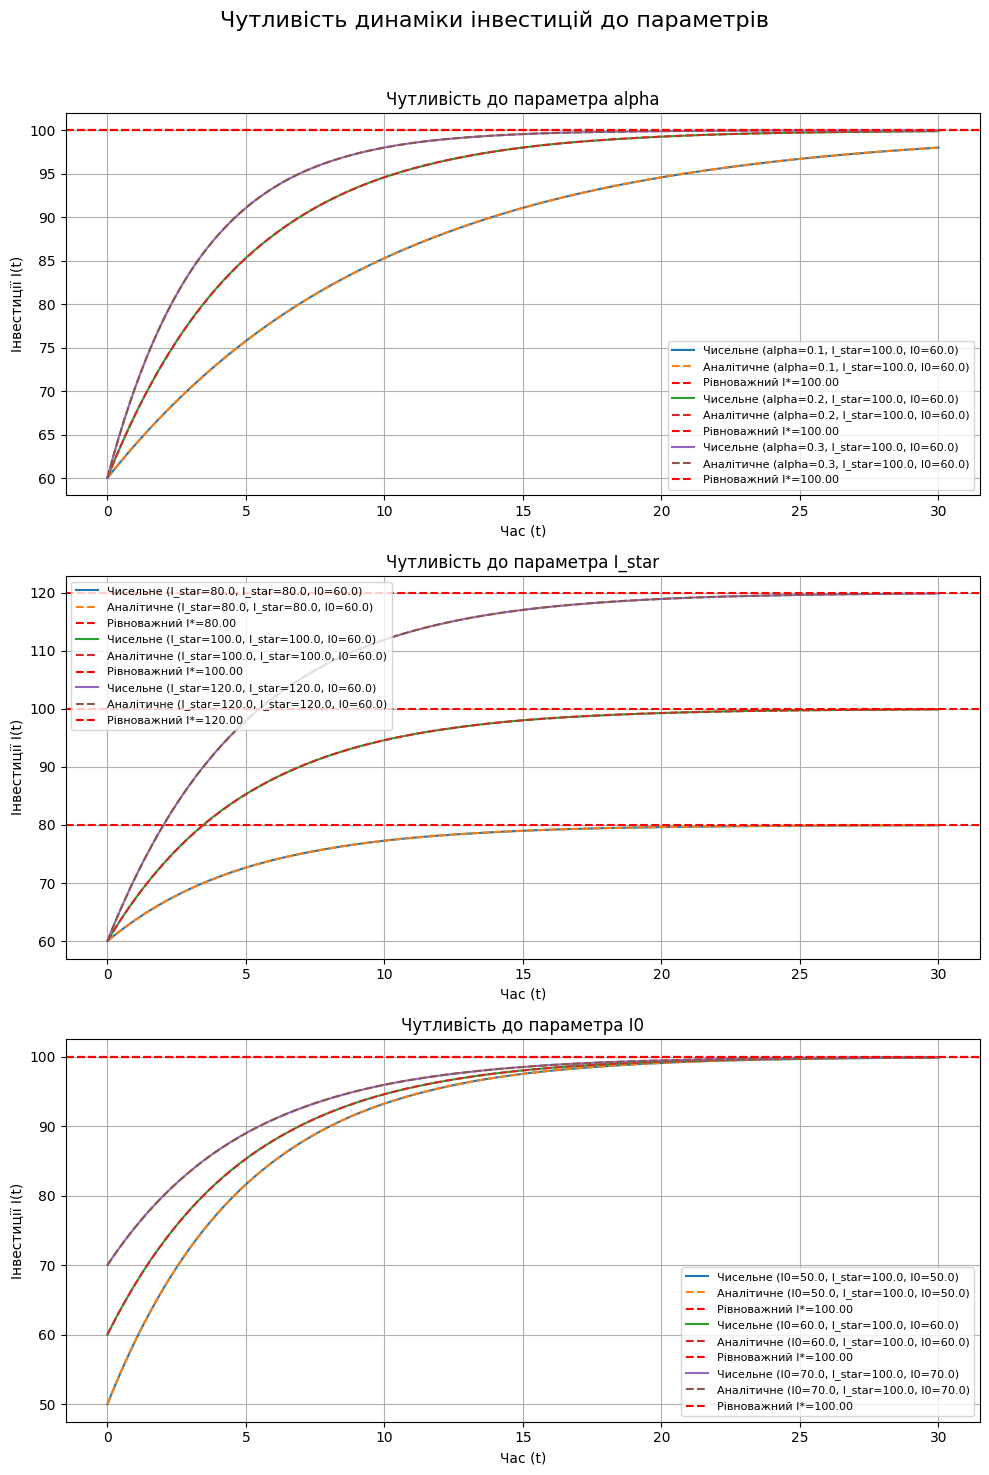

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Початкові параметри для моделі прогнозування інвестицій
initial_parameters = {
    "alpha": 0.2,  # Коефіцієнт швидкості корекції інвестицій
    "I_star": 100.0,  # Рівноважний рівень інвестицій
    "I0": 60.0  # Початковий рівень інвестицій
}

# Проміжок часу для моделювання
t_span = (0, 30)
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Диференціальне рівняння для моделі інвестицій
def investment_model(t, I, alpha, I_star):
    current_I = I[0]
    dIdt = alpha * (I_star - current_I)
    return [dIdt]

# Аналітичне рішення
def analytical_investment(t, I0, I_star, alpha):
    return I_star - (I_star - I0) * np.exp(-alpha * t)

# Створимо варіації для кожного параметра
param_variations = {
    "alpha": [0.1, 0.2, 0.3],  # Зміни коефіцієнта швидкості корекції
    "I_star": [80.0, 100.0, 120.0],  # Зміни рівноважного рівня інвестицій
    "I0": [50.0, 60.0, 70.0]  # Зміни початкового рівня інвестицій
}

# Створимо графіки для кожного параметра
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle("Чутливість динаміки інвестицій до параметрів", fontsize=16)

# Проходимо по кожному параметру і будуємо графіки
for i, (param, values) in enumerate(param_variations.items()):
    ax = axes[i]

    # Змінюємо кожен параметр і будуємо графіки
    for value in values:
        updated_params = initial_parameters.copy()
        updated_params[param] = value

        # Чисельне рішення
        solution = solve_ivp(
            investment_model, t_span, [updated_params["I0"]], t_eval=t_eval,
            args=(updated_params["alpha"], updated_params["I_star"])
        )

        # Аналітичне рішення
        analytical_solution = analytical_investment(t_eval, updated_params["I0"], updated_params["I_star"], updated_params["alpha"])

        legend_text = f"{param}={value}, I_star={updated_params['I_star']}, I0={updated_params['I0']}"

        # Графік чисельного та аналітичного розв'язку
        ax.plot(solution.t, solution.y[0], label=f"Чисельне ({legend_text})")
        ax.plot(t_eval, analytical_solution, '--', label=f"Аналітичне ({legend_text})")
        ax.axhline(y=updated_params["I_star"], color='r', linestyle='--', label=f'Рівноважний I*={updated_params["I_star"]:.2f}')

    # Налаштування графіка
    ax.set_title(f"Чутливість до параметра {param}")
    ax.set_xlabel("Час (t)")
    ax.set_ylabel("Інвестиції I(t)")
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Модель міграції**

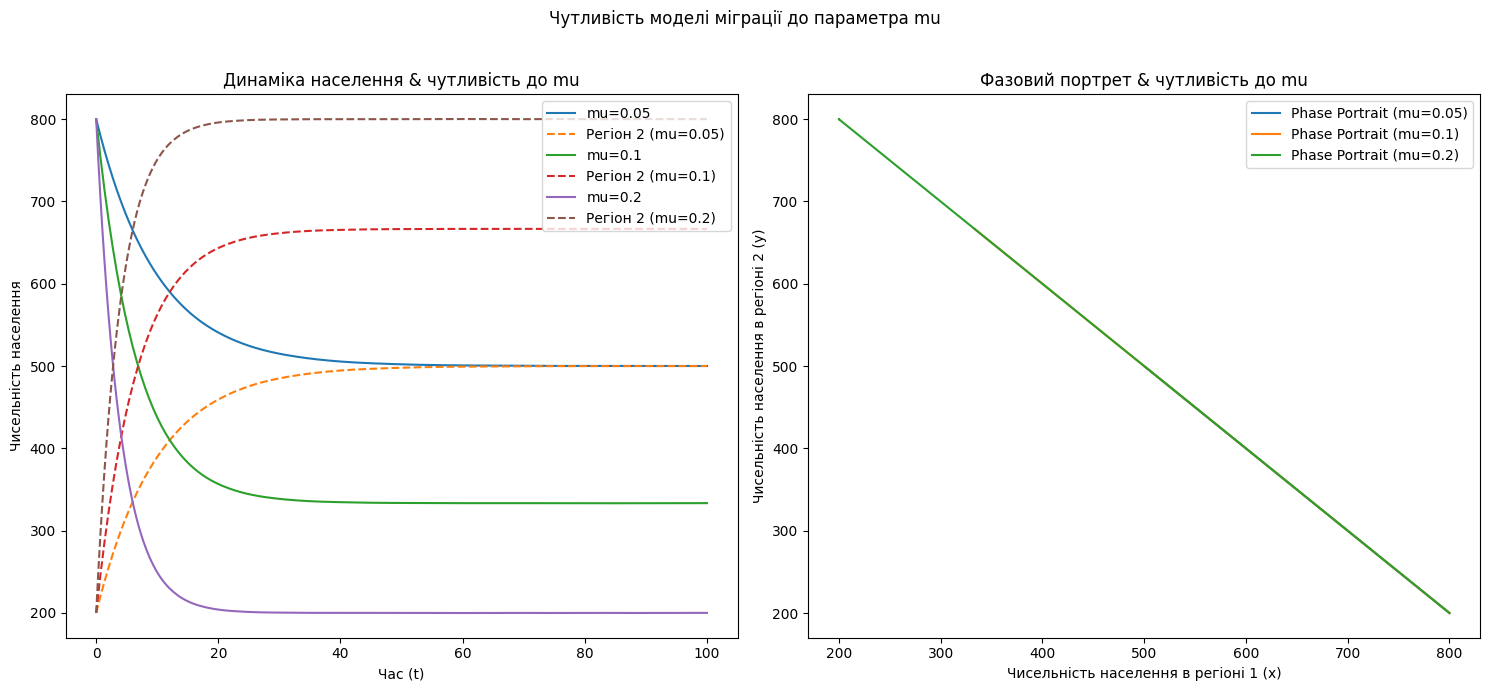

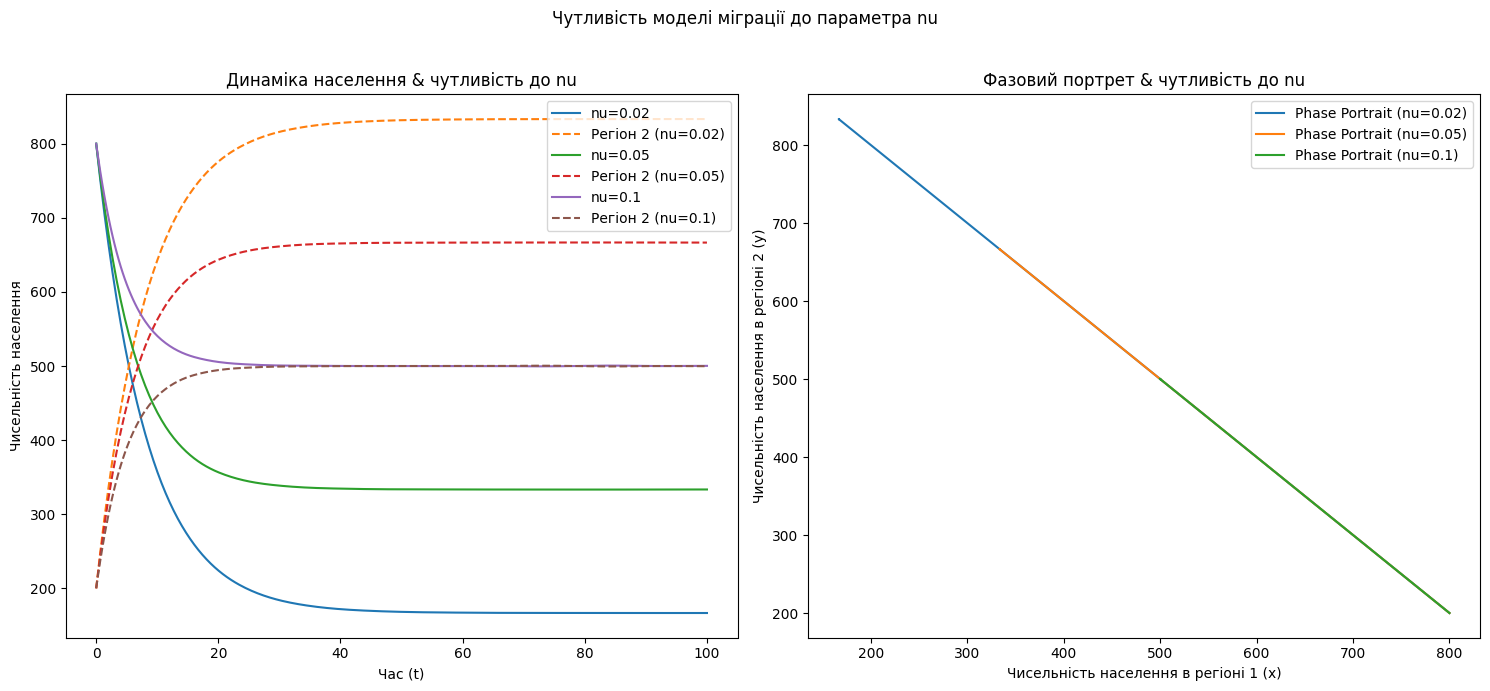

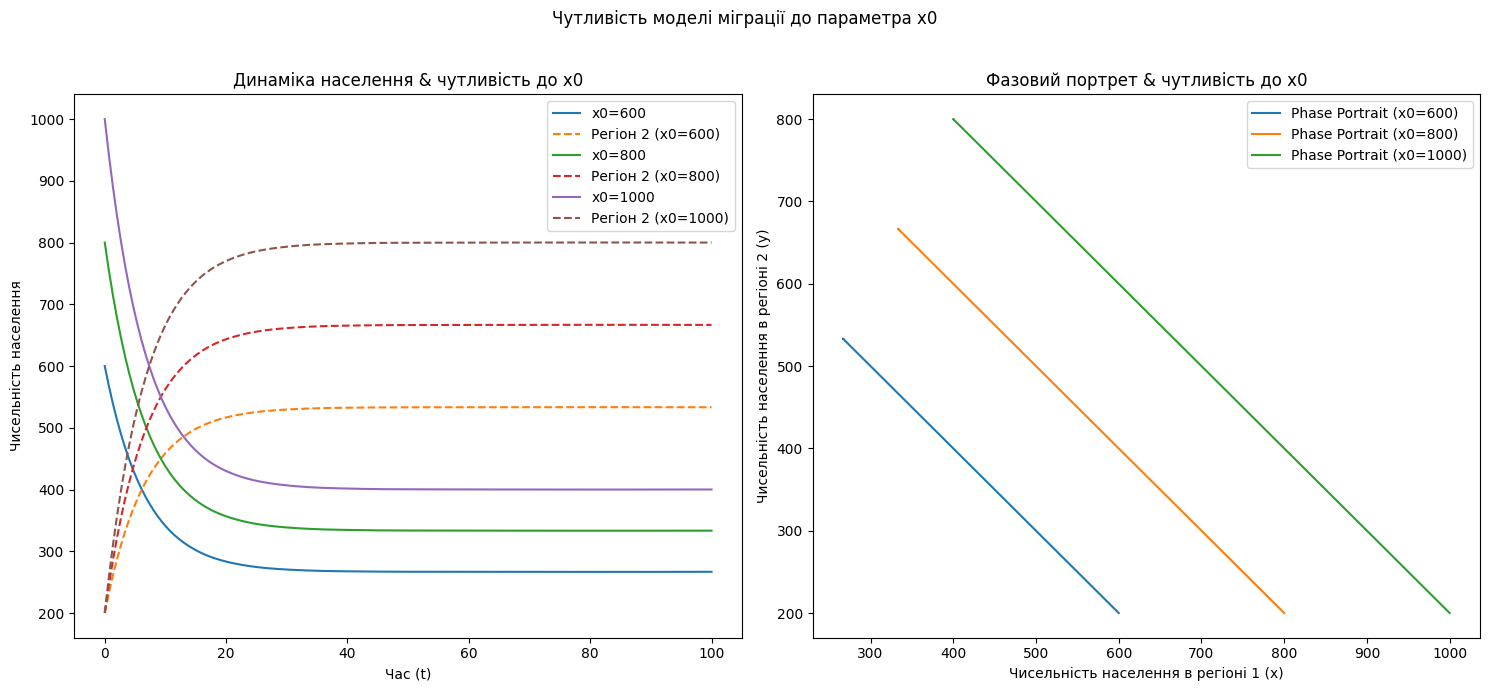

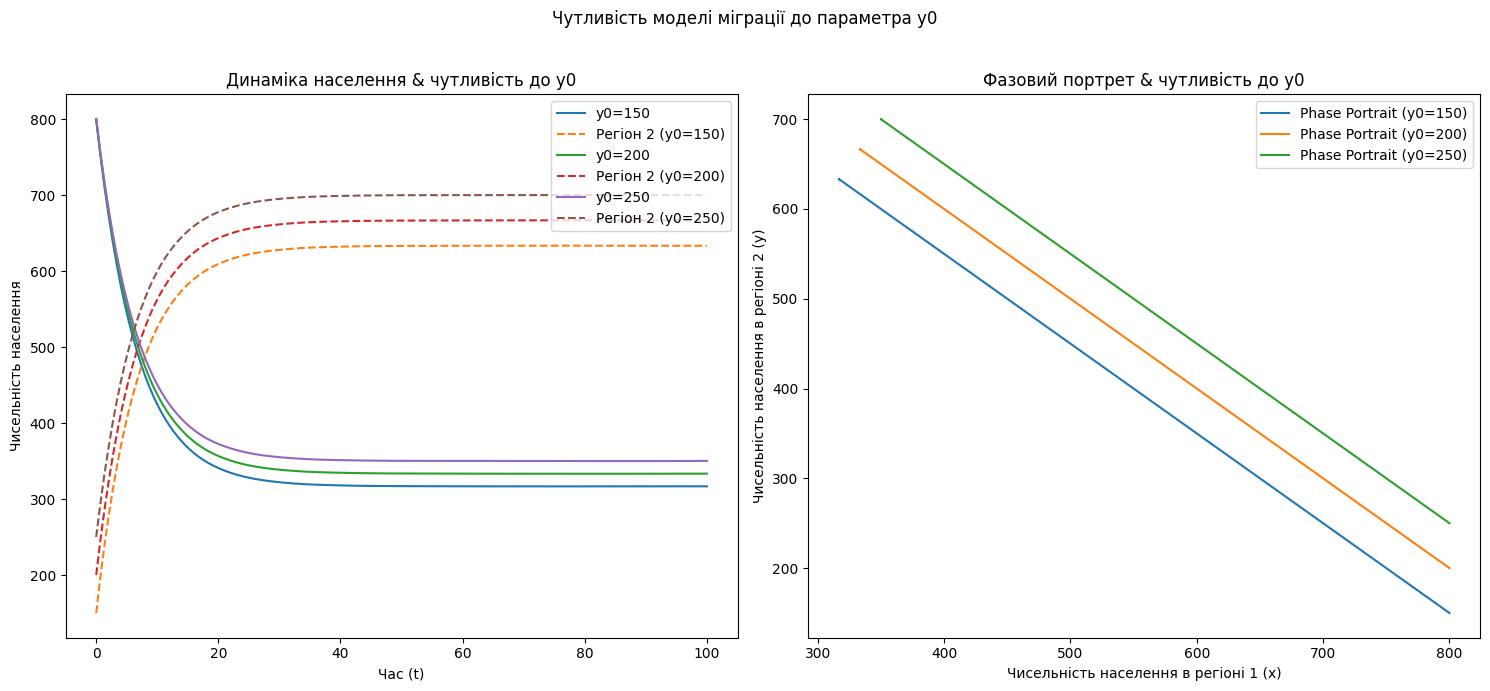

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Оновлені базові параметри
mu_value = 0.1  # Швидкість міграції з регіону 1 до регіону 2
nu_value = 0.05  # Швидкість міграції з регіону 2 до регіону 1
x0_value = 800  # Початкова чисельність населення в регіоні 1
y0_value = 200  # Початкова чисельність населення в регіонах 2

# Проміжок часу для моделювання
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Система диференціальних рівнянь для моделі міграції
def migration_system(t, populations, mu, nu):

    x, y = populations
    dxdt = -mu * x + nu * y
    dydt = mu * x - nu * y
    return [dxdt, dydt]

# Функція для побудови графіків чутливості
def plot_sensitivity(param_name, param_values, title):

    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Для кожної варіації параметра будуємо графіки
    for param_value in param_values:
        # Оновлення значення параметра
        params = {
            'mu': mu_value,
            'nu': nu_value,
            'x0': x0_value,
            'y0': y0_value
        }
        params[param_name] = param_value

        # Початкові умови для чисельності населення
        initial_conditions = [params['x0'], params['y0']]

        # Чисельне рішення системи диференціальних рівнянь
        solution = solve_ivp(
            migration_system, t_span, initial_conditions, t_eval=t_eval,
            args=(params['mu'], params['nu'])
        )

        # Графік динаміки чисельності населення
        axes[0].plot(solution.t, solution.y[0], label=f"{param_name}={param_value}")
        axes[0].plot(solution.t, solution.y[1], linestyle='--', label=f"Регіон 2 ({param_name}={param_value})")

        # Фазовий портрет для двох регіонів
        axes[1].plot(solution.y[0], solution.y[1], label=f"Phase Portrait ({param_name}={param_value})")

    # Налаштування графіку динаміки населення
    axes[0].set_title(f"Динаміка населення & чутливість до {param_name}")
    axes[0].set_xlabel("Час (t)")
    axes[0].set_ylabel("Чисельність населення")
    axes[0].legend(loc='upper right')

    # Налаштування графіку фазового портрету
    axes[1].set_title(f"Фазовий портрет & чутливість до {param_name}")
    axes[1].set_xlabel("Чисельність населення в регіоні 1 (x)")
    axes[1].set_ylabel("Чисельність населення в регіоні 2 (y)")
    axes[1].legend(loc='upper right')

    # Заголовок для всіх графіків
    fig.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Варіації параметрів для чутливості
param_variations = {
    "mu": [0.05, 0.1, 0.2],  # Варіації швидкості міграції
    "nu": [0.02, 0.05, 0.1],  # Варіації швидкості міграції
    "x0": [600, 800, 1000],   # Варіації початкової чисельності для регіону 1
    "y0": [150, 200, 250]     # Варіації початкової чисельності для регіону 2
}

# Викликаємо функцію для кожного параметра
for param, values in param_variations.items():
    plot_sensitivity(param, values, f"Чутливість моделі міграції до параметра {param}")


**Модель соціальної динаміки**

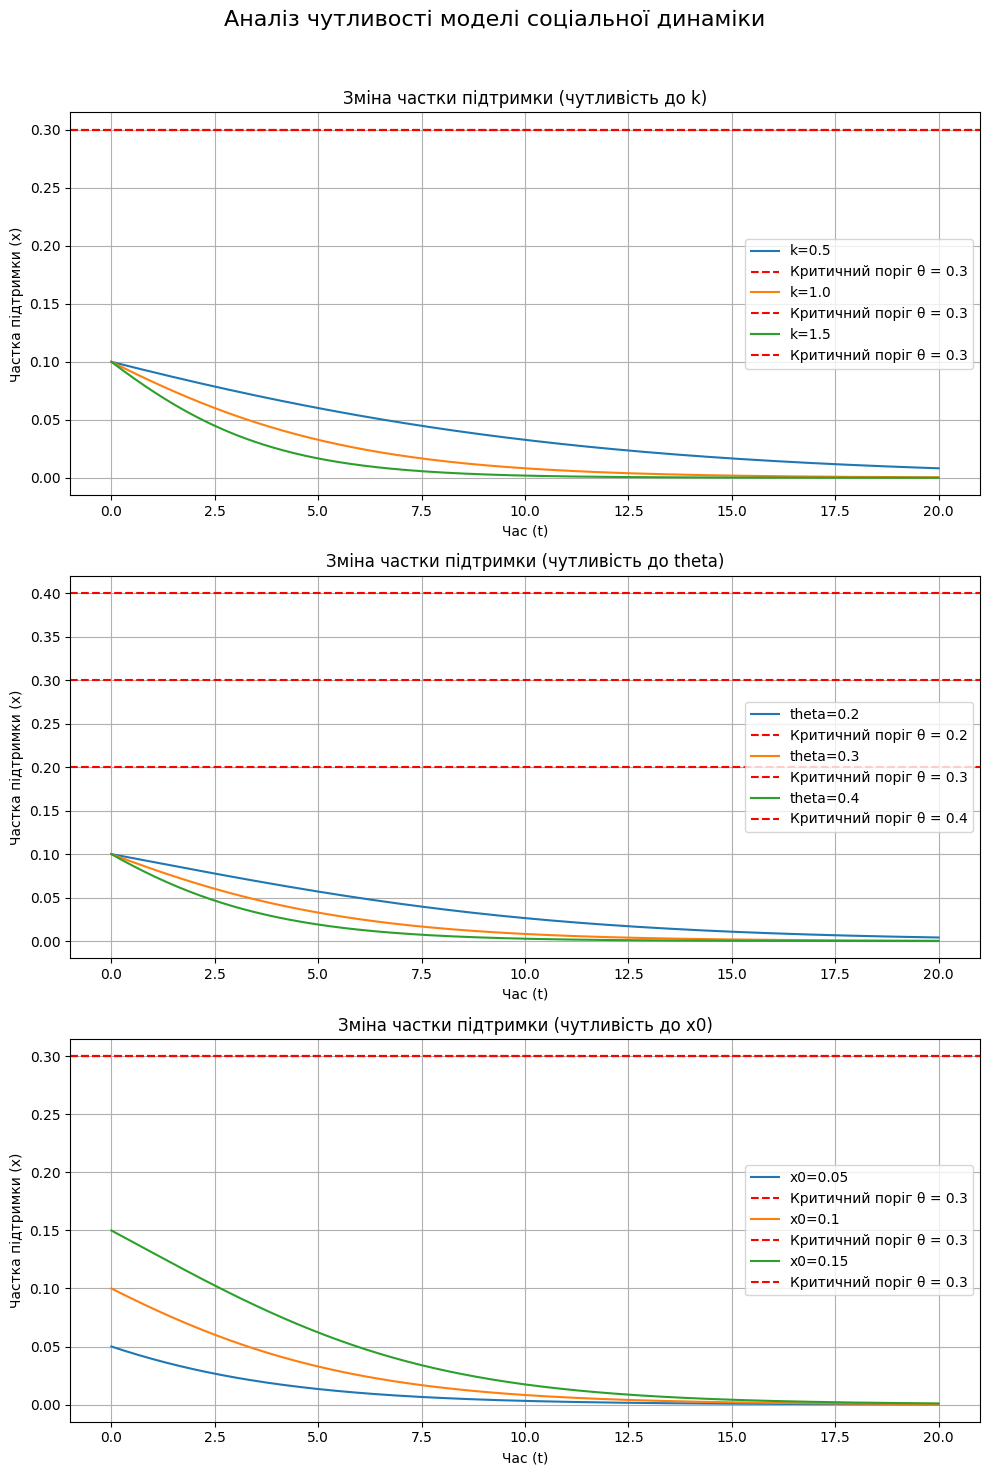

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Базові параметри моделі соціальної динаміки
base_params = {
    "k": 1.0,         # Коефіцієнт швидкості динаміки
    "theta": 0.3,     # Критичний поріг
    "x0": 0.1         # Початкова частка населення, що підтримує ідею
}

# Проміжок часу для моделювання
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Опис диференціального рівняння для моделі соціальної динаміки
def social_dynamics(t, x, k, theta):
    """
    Обчислює похідну dx/dt для моделі соціальної динаміки.

    Рівняння: dx/dt = k * x * (1 - x) * (x - theta)

    Параметри:
    - t: поточний час
    - x: поточна частка підтримки (масив NumPy, ndarray)
    - k: коефіцієнт швидкості динаміки
    - theta: критичний поріг

    Повертає:
    - dx/dt (масив NumPy, ndarray)
    """
    current_x = x[0]
    dxdt = k * current_x * (1 - current_x) * (current_x - theta)
    return np.array([dxdt])

# Варіації параметрів для аналізу чутливості
param_variations = {
    "k": [0.5, 1.0, 1.5],         # Варіації коефіцієнта швидкості динаміки
    "theta": [0.2, 0.3, 0.4],     # Варіації критичного порогу
    "x0": [0.05, 0.1, 0.15]       # Варіації початкової частки підтримки
}

# Побудова графіків
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle("Аналіз чутливості моделі соціальної динаміки", fontsize=16)

# Для кожного параметра будуємо 3 графіки
for i, (param, values) in enumerate(param_variations.items()):
    ax = axes[i]  # Графік зміни частки підтримки

    for value in values:
        # Оновлення параметрів
        params = base_params.copy()
        params[param] = value

        # Визначення критичного порогу для кожної варіації
        critical_threshold = params["theta"]  # Використовуємо відповідний поріг для кожної варіації

        # Чисельне рішення для поточного параметра
        solution = solve_ivp(
            social_dynamics,
            t_span,
            [params["x0"]],
            t_eval=t_eval,
            args=(params["k"], critical_threshold)
        )

        # Текст для легенди
        legend_text = f"{param}={value}"

        # Графік зміни частки підтримки
        ax.plot(solution.t, solution.y[0], label=f"{legend_text}")

        # Додавання критичного порогу на графік
        ax.axhline(y=critical_threshold, color='r', linestyle='--', label=f'Критичний поріг θ = {critical_threshold}')

    # Налаштування графіку зміни частки підтримки
    ax.set_title(f"Зміна частки підтримки (чутливість до {param})")
    ax.set_xlabel("Час (t)")
    ax.set_ylabel("Частка підтримки (x)")
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**ЗАВДАННЯ** **2**

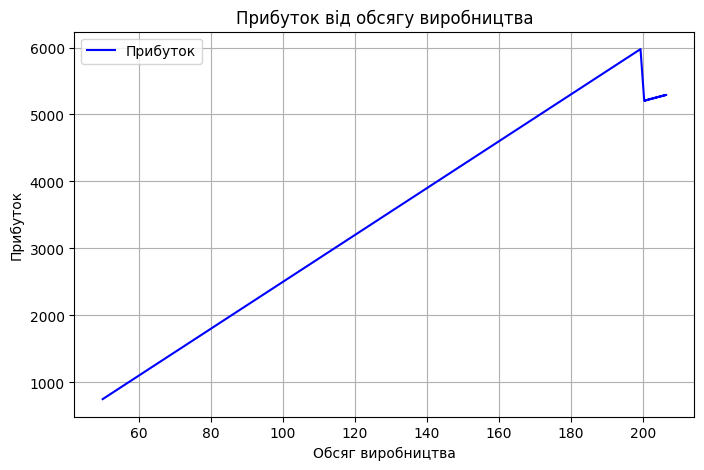

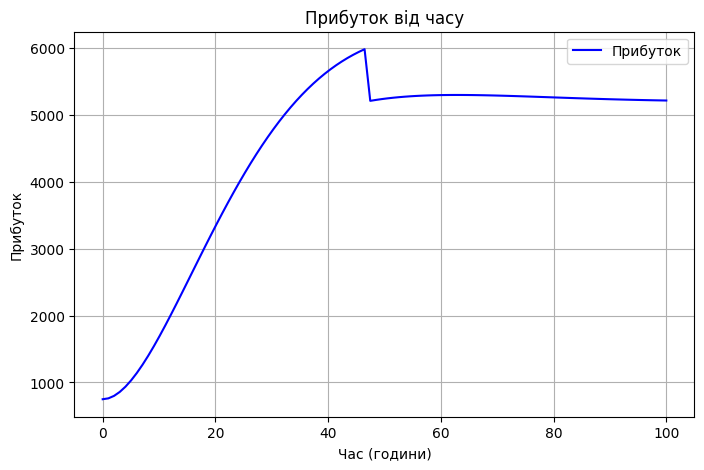

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Параметри моделі
fixed_cost = 1000        # Фіксовані витрати
variable_cost = 15       # Змінні витрати на одиницю продукції
price_per_unit = 50      # Базова ціна за одиницю продукції
time_per_unit = 0.5      # Час виробництва однієї одиниці продукції

# Обмеження виробництва
min_production = 50      # Мінімально допустиме виробництво
max_production = 200     # Максимально допустиме виробництво
penalty_low = 500        # Штраф за недовиконання плану
penalty_high = 800       # Штраф за перевиробництво

# Функція для розрахунку прибутку
def profit(P, D):
    if P <= max_production:
        price = price_per_unit
    else:
        price = max(price_per_unit - 0.1 * (P - max_production), 20)

    revenue = price * P
    cost = fixed_cost + variable_cost * P
    penalty = 0

    if P < min_production:
        penalty = penalty_low
    elif P > max_production:
        penalty = penalty_high

    production_time = P * time_per_unit
    return revenue - cost - penalty, production_time

# Диференціальні рівняння для зміни виробництва та попиту
def model(y, t):
    P, D = y  # P - виробництво, D - попит
    dPdt = 0.1 * (D - P)  # Швидкість зміни виробництва залежить від попиту
    dDdt = 0.05 * (max_production - P)  # Попит залежить від різниці між максимальним виробництвом і поточним рівнем
    return [dPdt, dDdt]

# Початкові умови: початкове виробництво та попит
initial_conditions = [50, 50]

# Час, на якому будемо розв'язувати рівняння
t = np.linspace(0, 100, 100)  # від 0 до 100 одиниць часу

# Розв'язок диференціальних рівнянь
solution = odeint(model, initial_conditions, t)

# Розпаковка результатів
P_sol, D_sol = solution.T

# Обчислення прибутку та часу для кожного часу
profits = [profit(P, D)[0] for P, D in zip(P_sol, D_sol)]
production_times = [profit(P, D)[1] for P, D in zip(P_sol, D_sol)]

# Графік 1: Прибуток від обсягу виробництва
plt.figure(figsize=(8, 5))
plt.plot(P_sol, profits, label="Прибуток", color="b")
plt.xlabel("Обсяг виробництва")
plt.ylabel("Прибуток")
plt.title("Прибуток від обсягу виробництва")
plt.grid(True)
plt.legend()
plt.show()

# Графік 2: Прибуток від часу
plt.figure(figsize=(8, 5))
plt.plot(t, profits, label="Прибуток", color="b")
plt.xlabel("Час (години)")
plt.ylabel("Прибуток")
plt.title("Прибуток від часу")
plt.grid(True)
plt.legend()
plt.show()

